# Notebook 09: Interpretation of a trained ML model

### Goal: Show some examples of how to interogate a trained ML model

#### Background

While alot of this tutorial has been working up to training and evaluating a ML model they can still seem a bit like a black box. In order to help unvail some things that the ML model has learned, we will do a few *explination* methods on the ML here. Specifically, we will show an example of *permuation importance* and the *accumulated local effects*. Both of these methods were discussed in the paper and are already coded up for you in the ```scikit-explain``` python package maintained by Dr. Flora at CIWRO [link](https://github.com/monte-flora/scikit-explain).

In order to save some time in setting up python, I did not include this package in the original install. So to install if please activate your ```waf_tutorial_part1``` enviornment

```$ conda activate waf_tutorial_part1 ``` 

then pip install the ```scikit-explain```

```$ pip install scikit-explain``` 

#### Load presaved model + Training Data 

In notebook 4 and 5, we showed you how to save/load the simple ML model. Feel free to change the path to that file if you wish to see your model results. If not, leave the file path as is to see the trained models in the paper (without SVM because there is no ```predict_proba``` method, which is needed).

Just like the paper, we will start with the classification models. We also need the training data to do the investigations, so lets load that in too

In [1]:
###################################### Load trained models ######################################
import joblib
names = ['LogisticRegression.pkl','NaiveBayes.pkl','DecisionTree.pkl','RandomForest.pkl','GradientBoostedTrees.pkl',]
start_path = '../datasets/sklearnmodels/classification/allfeatures/'
model_list = []

for name in names:
    #notice the change from wb to rb 
    savefile = open(start_path + name,'rb')
    #notice the change from dump to load 
    model_list.append(joblib.load(savefile))
    
print(model_list)
################################################################################################

###################################### Load training data ######################################
#import some helper functions for our other directory.
import sys
sys.path.insert(1, '../scripts/')
from aux_functions import load_n_combine_df
import numpy as np
(X_train,y_train),_,_ = load_n_combine_df(path_to_data='../datasets/sevir/',features_to_keep=np.arange(0,36,1),class_labels=True)
################################################################################################

[LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier()]


In [2]:
import skexplain

In [3]:
explainer = skexplain.ExplainToolkit()
pathloc = '../datasets/explanations/multipass_importance_auc_full_backward_ALLMODELS.nc'
# Load the results file; gets load as a class attribute 
results = explainer.load(fnames=pathloc)

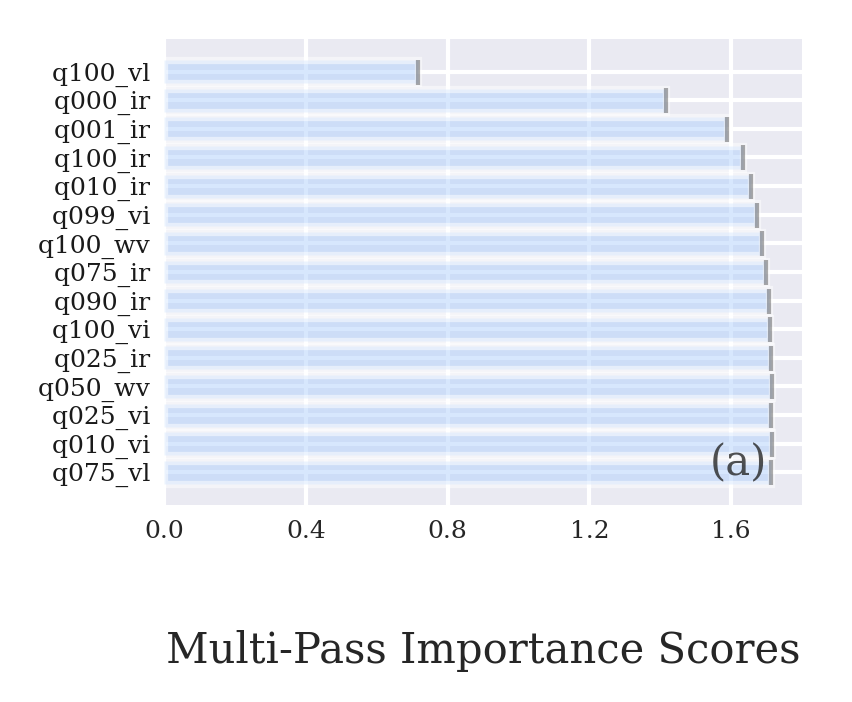

In [10]:
fig = explainer.plot_importance(data=results, 
                                panels=[('multipass', 'LgR')], 
                                num_vars_to_plot=15, 
                                 )

In [5]:
explainer

ExplainToolkit(estimator=OrderedDict([(None, None)]) 
                                  estimator_names=['LgR', 'NB', 'DT', 'RF', 'GBT'] 
                                  X=<class 'pandas.core.frame.DataFrame'> length:0 
                                  y=<class 'numpy.ndarray'> length:0 
                                  estimator_output=probability 
                                  feature_names=<class 'list'> length 1)